### Homework DL Starter Code and Instructions
### Tyler Echols

### Step 1: Description

This notebook performs regression to estimate the price of a car given various features. 

### Step 2: Load the data 

* upload the data
* put the data in a pandas dataframe
* output the data shape (rows, cols)
* output the first few rows of the data

In [ ]:
# load the csv file up into the cloud




In [ ]:
# load the data into a pandas data frame
import pandas as pd
df = pd.read_csv('audi.csv')
print('\n Audi Data Frame \n', df)

# print the shape of the data frame
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])

# display the first few rows
df.head()


 Audi Data Frame 
       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]

DataF

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Step 3 Data Exploration



In [ ]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [ ]:
# change categorical column type from object to category
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

df.dtypes


model           category
year               int64
price              int64
transmission    category
mileage            int64
fuelType        category
tax                int64
mpg              float64
engineSize       float64
dtype: object

In [ ]:
# check for NAs
df.isnull().values.any()

False

In [ ]:
# use describe() to examine the data
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


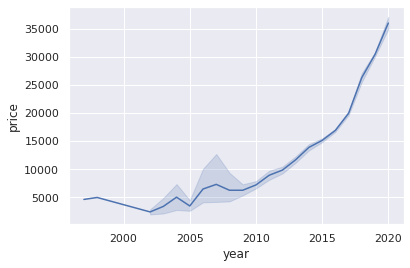

In [ ]:
# using seaborn, craete a lineplot() with year on the x axis and price on the y axis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")

df = pd.read_csv('audi.csv')

sns.lineplot(x = "year", y = "price", data = df)
plt.show()

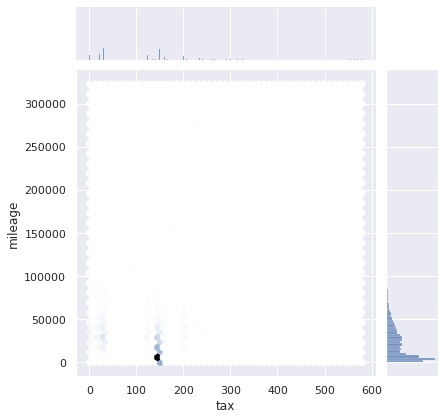

In [ ]:
# create another plot exploring the data
# choose columns and plot type

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.jointplot(x=df["tax"], y=df["mileage"], kind='hex')
plt.show()

### Step 4 Prepare Data

You can use the code below for this step. 



In [ ]:
# set up X and y

X=df.drop(columns=['price'],axis=1)
y=df['price']


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('audi.csv')

X = df.iloc[:, 0:12]
y = df.iloc[:, 8]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

# scale the numeric data
col_list = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = MinMaxScaler()
train_numeric = scaler.fit_transform(X_train[col_list])
test_numeric = scaler.transform(X_test[col_list])

# one-hot encode the categorical data for model, transmission, and fuelType
# model
zipBinarizer = LabelBinarizer().fit(df['model'])
train_model = zipBinarizer.transform(X_train['model'])
test_model = zipBinarizer.transform(X_test['model'])
# transmission
zipBinarizer = LabelBinarizer().fit(df['transmission'])
train_transmission = zipBinarizer.transform(X_train['transmission'])
test_transmission = zipBinarizer.transform(X_test['transmission'])
# fuelType
zipBinarizer = LabelBinarizer().fit(df['fuelType'])
train_fuelType = zipBinarizer.transform(X_train['fuelType'])
test_fuelType = zipBinarizer.transform(X_test['fuelType'])

# concatenate
X_train_input = np.hstack([train_numeric, train_model, train_transmission, train_fuelType])
X_test_input = np.hstack([test_numeric, test_model, test_transmission, test_fuelType])

print(X_train_input[:3])




train size: (8534, 9)
test size: (2134, 9)
[[0.82608696 0.09205406 0.05172414 0.25088548 0.31746032 0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         0.
  0.        ]
 [0.95652174 0.02784873 0.25       0.15289256 0.23809524 1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  1.        ]
 [0.86956522 0.06860478 0.03448276 0.29515939 0.31746032 0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

### Step 5 Linear regression

Run linear regression in sklearn. 

In [ ]:
# train the algorithm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('audi.csv')
print(df.head())
print('data frame:', df.shape)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

linreg = LinearRegression()
linreg.fit(X_train_input, y_train)
print(linreg.score(X_test_input, y_test)) 


  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
data frame: (10668, 9)
train size: (8534, 9)
test size: (2134, 9)
1.0


In [ ]:
# make predictions
y_pred = linreg.predict(X_test_input)
print(y_pred)

[2.  3.  1.4 ... 2.  2.  1.6]


In [ ]:
# evaluation on the test data using mse, mae, and r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
r2_scr = r2_score(y_true=y_test, y_pred=y_pred) 

print("mse", mse)
print("mae", mae)
print("rmse", rmse)
print("R2 Score", r2_scr)


mse 1.7920871898128292e-25
mae 3.1176186281115066e-13
rmse 4.233305079737142e-13
R2 Score 1.0


In [ ]:
# display the first 5 predictions
print(y_pred)

[2.  3.  1.4 ... 2.  2.  1.6]


In [ ]:
# display the first 5 actual values
print(X_test_input)

[[0.82608696 0.17268379 0.34482759 ... 0.         0.         1.        ]
 [0.95652174 0.00927259 0.25       ... 1.         0.         0.        ]
 [0.82608696 0.03290453 0.25       ... 0.         0.         1.        ]
 ...
 [0.86956522 0.05374696 0.28448276 ... 0.         0.         1.        ]
 [0.95652174 0.02475271 0.25862069 ... 1.         0.         0.        ]
 [0.95652174 0.02041827 0.25       ... 1.         0.         0.        ]]


### Regression in Keras

In [ ]:
# build a sequential model
# you choose the architecture

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

df = pd.read_csv('audi.csv')
df = tf.keras.datasets.mnist


batch_size = 128
num_classes = 10
epochs = 20
(x_train, y_train), (x_test, y_test) = df.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
num_filters = 8
filter_size = 3
pool_size = 2


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.summary()

TensorFlow version: 2.8.2
11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) train samples
(10000, 28, 28) test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))



Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2501 - accuracy: 0.9243 - val_loss: 0.1033 - val_accuracy: 0.9671
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1028 - accuracy: 0.9685 - val_loss: 0.0786 - val_accuracy: 0.9764
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0721 - accuracy: 0.9770 - val_loss: 0.0721 - val_accuracy: 0.9771
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0560 - accuracy: 0.9822 - val_loss: 0.0738 - val_accuracy: 0.9776
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0698 - val_accuracy: 0.9796
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.0705 - val_accuracy: 0.9805
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0703 - val_accuracy: 0.980

In [ ]:
# output test mse score, test mae score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error as mae 


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.0851413905620575
Test accuracy: 0.9824000000953674


### Step 7 Commentary

Answer the following questions:

a. Compare metrics from sklearn and Keras. 

SkLearn handles multi-label classification, and doesen't have native support for gpu computing. However both of these can use deep learing but Keras dosen't have the means for gpu computing efficently like sklearn.   


b. Explore the data a bit more to speculate on why you achieved the results you got. 

it was all based on the algorithm handled the data set and what was possiable for the instreted data to wprk with. the changes I could make would give me result thgat were to out of bounds or undefined beased on the import functions that were being used. 


c. Describe all the architectures/hyperparameters you tried and the results. What do you conclude?

The architure I used allowed for handling valuse at the max available for the number of data inputs I had which as at max 30. But even at 30 it would crash on me so I had to reduce it 28 which seems to be the best spot for itto run 

